# Part 2: Linear Regression


In this part, we will be working with a dataset scraped by [Shubham Maurya](https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data), which collects facts about players in the English Premier League as of 2017. His original goal was to establish if there was a relationship between a player's popularity and his market value, as estimated by transfermrkt.com.

**Your goal is to fit a model able to predict a player's market value.**

## The dataset

The dataset contains the following information:
| **Field**   |     **Description**      |  
|-------------|-------------|
| name   |  Name of the player |
| club   |  Club of the player |
| age    | Age of the player |
|position| The usual position on the pitch
|position_cat| 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers|
|market_value| As on transfermrkt.com on July 20th, 2017|
|page_views| Average daily Wikipedia page views from September 1, 2016 to May 1, 2017|
|fpl_value| Value in Fantasy Premier League as on July 20th, 2017|
|fpl_sel| % of FPL players who have selected that player in their team|
|fpl_points| FPL points accumulated over the previous season|
|region| 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World|
|nationality| Player's nationality|
|new_foreign| Whether a new signing from a different league, for 2017/18 (till 20th July)|
|age_cat| a categorical version of the Age feature|
|club_id| a numerical version of the Club feature|
|big_club| Whether one of the Top 6 clubs|
|new_signing| Whether a new signing for 2017/18 (till 20th July)|

## Exercise 1: Exploring the data
The first step you need to do is to explore your data.

We will start wil the necessary imports. In this exercise, we will be working with the library `pandas`. If you are not familiar with it, it is recommended that you follow the introductory exercises that can be found in the course's github repository.

In [122]:
import numpy as np
import pandas as pd

In [123]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


We will now proceed to read the dataset:

In [124]:
league_df = pd.read_csv('data/football_data.csv') #Reads a CSV file

### Task 1.1: Using pandas for data exploration
Use the method `name_dataframe.head(N)` (N is the number of entries) to look at the first instances of the dataframe. 

Then, use the method `name_dataframe.describe(include='all')` to generate descriptive statistics that summarize each field of the dataframe. 

Finally, print the result of `name_dataframe.dtypes`, in this way you print out the data types associated to each of the fields in the table 

In [125]:
#Your code for head
league_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [126]:
#Your code for describe
league_df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [127]:
#Your code for d_type
league_df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

### Question set 1.1: About the data
1. What is the name of the appearing in the 7th record of the dataset?
2. What is the mean age in the English Premier League (in 2017)? 
3. What fields store a continuous value?

Your answers here:

In [128]:
# 1 get the 7th record of league_df
league_df.iloc[6]["name"]

'Olivier Giroud'

In [129]:
# 2 mean age
league_df["age"].mean()


26.80477223427332

In [130]:
# 3
for i in league_df:
    if league_df.dtypes[i] == "float64":
        print(i)

market_value
fpl_value
region


## Exercise 2: Data splits, data preparation and training
Before starting the training procedure, we need to split the data into the training, validation and test sets.

In this exercise, the data will be already given split for you. 

In [131]:
#Loading the splits
df_train = pd.read_csv('data/league_train.csv')
df_val = pd.read_csv('data/league_val.csv')
df_test = pd.read_csv('data/league_test.csv')

Alternatively, for the type of data used in this exercise, the library `scikit-learn` contains the function `train_test_split` that allows to automatically split the data.

### Question set 2.1 Train_test_split
Look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) of the `train_test_split` function:
1. What parameters it receives as input? Provide examples illustrating.
2. What is the role of the parameter shuffle?
3. What is the role of the parameter test_size?
4. The function does not generate a validation set. What would you do to obtain the desired data splits (train, validation and test)? Answer using pseudo-code (Bonus: Write the code for it so that it can run using some dummy generated data). 

Your answers here:

1. inputs: 
the function receive some arrays to split for training

2. the test_size represents the proportion of data in the test split : test_size = 0.25 => there is 1/4 datas in the test.

3. the train_size: the same for the train file 

random_states: random source to split data sets. Can be desterministic as well

shuffle: boolean to randomize data before spliting

stritify : whether or not you want to use many random small sequement of a data to create a dataset or only one big of random position
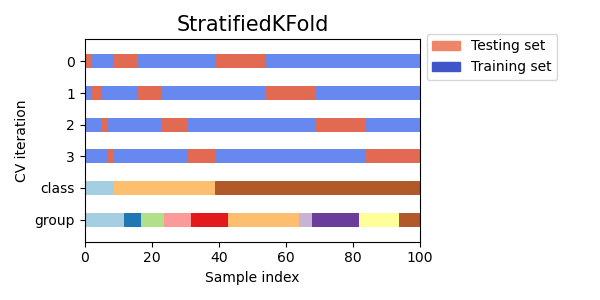


4. Code below



In [132]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [133]:
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5) # or anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=32)
print(X_train, X_test, y_train, y_test)


[[2 3]
 [6 7]] [[8 9]
 [0 1]
 [4 5]] [1, 3] [4, 0, 2]


The dataset contains a lot of features that can be used to build the model. We will start by using `age, fpl_value, big_club` and `page_views`.

$$\hat{y} = w_0 + w_1 x_{age} + w_2 x_{fplavalue} + w_3 x_{bigclub} + w_4(x_{pageviews})^{1/2}$$

Before training the model, we need to prepare the data so that it can be used for training, validation and testing. The following steps need to be executed to prepare the data:

1. Apply the np.sqrt( ) on the values of page_views
2. Transform our variable in numpy array np.array(variable)
3. Add a columns of ones to the matrix $\mathbf{X}$  so it can handle the parameter $w_0$.

### Task 2.1 Prepare data
Complete the function `prepare_data(DataFrame)` where indicated so that all the steps listed above are performed.

In [134]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    '''
        INPUT :
        - df : a pandas DataFrame

         OUTPUT :
        - variable_array : The processed array
    ''' 
    #We obtain a copy of the relevalnt fields from the DataFrame. This avoids modifying the dataframe directly. Instead, we work in a copy. Notice that we are not copying pageviews field
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    
    #Step 1.  Apply the np.sqrt( ) on the values of page_views
    variable['sqrt_page_views'] = [np.sqrt(x) for x in df['page_views']]
    
    # Step 2. Transform our variable in numpy array np.array(variable)
    variable_array = np.array(variable)
    
    # Step 3. Add a columns of ones to the matrix 𝐗 so it can handle the parameter 𝑤0.
    # For this purpose we will use the function PolynomialFeatures from scikit-learn
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

prepare_data(df_train)

array([[ 1.        , 24.        ,  4.5       ,  1.        , 18.84144368],
       [ 1.        , 32.        ,  7.5       ,  0.        , 37.72267223],
       [ 1.        , 26.        ,  5.5       ,  0.        , 22.89104628],
       ...,
       [ 1.        , 29.        ,  6.5       ,  0.        , 33.77869151],
       [ 1.        , 26.        ,  7.5       ,  1.        , 39.        ],
       [ 1.        , 23.        ,  5.5       ,  1.        , 17.23368794]])

### Question set 2.2 PolynomialFeatures function
Investigate the role of the [Polynomial features function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from scikit-learn. 
1. Why did the order of the polynomial was set to one in the prepare_data function? 
2. Given two features $x_1, x_2$, write down the expression that you would obtain by using the function by setting `degree=2`

Your answer here: 
1. The degree parameter of function is the maximal degree of the polynome if it is an int. Then n the polynome degree is n<1 => n=0 as n >= 0
So the polynome is constant, then the variable will fit a constant value.
2.  y = $x_1 + t * x_2$, then the variable will fit a linear function

Now, we execute the function to prepare the data.

In [135]:
#We copy the output label
output_df_train=df_train['market_value'].copy()
#We remove the output label from X
input_df_train=df_train.drop(['market_value'],axis=1)

#process is repeated for test and validation
output_df_val=df_val['market_value'].copy()
input_df_val=df_val.drop(['market_value'],axis=1)

output_df_test=df_test['market_value'].copy()
input_df_test=df_test.drop(['market_value'],axis=1)

#We call prepare_data
X_train = prepare_data(input_df_train)
X_val = prepare_data(input_df_val)
X_test = prepare_data(input_df_test)
y_train = np.array(output_df_train)
y_val = np.array(output_df_val)
y_test = np.array(output_df_test)

We will now proceed to train our first model. In this case, we will use a "home made" implementation of linear regression. When dealing with more complex (and real) applications it is best to use the implementation that can be found in scikit-learn. 

We will define a class called my_linear_regression with four methods:
1. `__init__(self)` : Constructor for the object to assign the object its properties
2. `fit(self, X, y)` : Learning step of linear regression.
3. `predict(self, X)` : predicts new labels $\hat{y}$ given an input X
4. `MSE(self,y_pred, y_test)` : Estimates the mean sum of squared errors between a set of predictions and the ground truth. 


### Task 2.2 Mean sum of squared errors
Implement the MSE function in the class below: 

In [136]:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T @ X,X.T @ y)
    
    def predict(self,x_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        
        return self.y_hat
    
    def MSE(self,y_pred, y_test) :
        MSE = np.sum((y_pred-y_test)**2)/len(y_test)
        return MSE
    
    def RSS(self,y_pred, y_test) :
        RSS = np.sum((y_pred-y_test)**2)
        return RSS

Now we can train our first model. 

In [137]:
model_1=my_linear_regression()
model_1.fit(X_train,y_train)

print(f'The learned model has parameters:\n{model_1.weights}\n')

The learned model has parameters:
[-15.66271385  -0.16641898   4.45892732   6.28285382   0.18420319]



### Question set 2.3: Interpreting the weights
The estimated weights $\mathbf{w}$ (excluding $w_0$) are associated to 'age', 'fpl_value', 'big_club' and 'page_views' (squared root), in that order. 
1. How do you interpret the values of each of these parameters? Based on this information, what can you say about the effect in a player's market value of his: age? number of page views? fpl value?
2. Which of these features seems to have the largest effect on a player's value? 
3. How do you interpret the value obtained for $w_0$?

1.  the age value is non-positive: then the age is decreasing stongly the player value, such as the fpl_value in an slighter scale. In opposit, being part of a big club increases the market value, such as the page_views in an slighter scale.
2. The largest absolute value is the age weight, it is the one that affects the most the player value among studied values.
3. It is weight of player market value every things beeing equal.

## Exercise 3: Adding categorical features
It is well known that the position where a football player plays has an impact in his market value. Midfielders and strikers tend to be more expensive. Your goal now is to include this information in the model.

As seen from the description, the player position is encoded as a numeric variable (1, 2, 3, 4). However, they represent categories and not values on their own. Categorical variables are commonly encoded under a scheme denoted 1-of-K encoding. This allows to convert a variable representing K different categories into K different binary values. Example:

| **attacker**   |  **midfielder**      |  **defender** | **goalkeeper** |
|-------------|-------------|-------------|-------------|
| 1 | 0 | 0 | 0|
| 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 

### Question 3.1: Adding the position to the model
Write down the expression of the model if you consider the position of the player using 1-of-K encoding.

Your answer here:

In [138]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    '''
        INPUT :
        - df : a pandas DataFrame

         OUTPUT :
        - variable_array : The processed array
    ''' 
    #We obtain a copy of the relevalnt fields from the DataFrame. This avoids modifying the dataframe directly. Instead, we work in a copy. Notice that we are not copying pageviews field
    variable = df[['age', 'fpl_value', 'big_club', 'position_cat']].copy()
    
    #Step 1.  Apply the np.sqrt( ) on the values of page_views
    variable['sqrt_page_views'] = [np.sqrt(x) for x in df['page_views']]

    position = np.zeros((len(df), 4))

    for i in range(len(df)):
        position[i, int(variable.iloc[i]['position_cat']-1)] = 1
    
    
    del variable['position_cat']
    # Step 2. Transform our variable in numpy array np.array(variable)
    variable = np.array(variable)
    variable_array = np.concatenate((variable, position), axis=1)
    
    # Step 3. Add a columns of ones to the matrix 𝐗 so it can handle the parameter 𝑤0.
    # For this purpose we will use the function PolynomialFeatures from scikit-learn
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    return variable_array


#print(df_train)
prepare_data(df_train)


array([[ 1. , 24. ,  4.5, ...,  0. ,  1. ,  0. ],
       [ 1. , 32. ,  7.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 26. ,  5.5, ...,  0. ,  1. ,  0. ],
       ...,
       [ 1. , 29. ,  6.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 26. ,  7.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 23. ,  5.5, ...,  0. ,  0. ,  1. ]])

### Task 3.1 Preparing data with position features
We need to modify the data preparation function so that it now includes the categorical features. For this matter, we have implemented the function `prepare_data_with_position(df)`. It contains the same functionality as the function `prepare_data(df)` and it adds the generation of the 1-of-K encoding. 

Complete the missing code in the function.

In [139]:
def prepare_data_with_position(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] =  [np.sqrt(x) for x in df['page_views']]

    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')).copy() # create a copy of the DataFrame before modifying it
    for i in range(1,5):
        for j in range(len(variable)):
            variable.loc[j, 'pos_'+str(i)]=1. if bool(variable.loc[j, 'pos_'+str(i)]) else 0.
    #print(variable)
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    
    return variable_array
prepare_data_with_position(df_train)

/tmp/ipykernel_1129420/3470182248.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  variable.loc[j, 'pos_'+str(i)]=1. if bool(variable.loc[j, 'pos_'+str(i)]) else 0.
/tmp/ipykernel_1129420/3470182248.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  variable.loc[j, 'pos_'+str(i)]=1. if bool(variable.loc[j, 'pos_'+str(i)]) else 0.


array([[ 1. , 24. ,  4.5, ...,  0. ,  1. ,  0. ],
       [ 1. , 32. ,  7.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 26. ,  5.5, ...,  0. ,  1. ,  0. ],
       ...,
       [ 1. , 29. ,  6.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 26. ,  7.5, ...,  0. ,  0. ,  0. ],
       [ 1. , 23. ,  5.5, ...,  0. ,  0. ,  1. ]])

### Question 3.2 The get_dummies function
Explain what the following line of code is doing:

`variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos'))`

pd.get_dummies converts categorical variable into dummy/indicator 1-of-K variables.

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

### Task 3.2 Train the new model
Your task now is to train the new model. For this you will need to execute the following steps: 
1. Prepare all your data (train, validation and testing). 
2. Create a new `my_linear_regression` object and store it in a variable named `model_2`
3. Run the learning process
4. For inspection purposes, print out the obtained weights.

**Important:** While preparing the data, make sure you do not override the previous data used for model_1

In [140]:
#Your code here
train = prepare_data_with_position(df_train)
print(train[0])
val = prepare_data_with_position(df_val)
test = prepare_data_with_position(df_test)
model_2 = my_linear_regression()
model_2.fit(train, y_train)
model_2.predict(val)
print(model_2.weights)

[ 1.         24.          4.5         1.         18.84144368  0.
  0.          1.          0.        ]
[ -1.46941218  -0.23267517   5.55326834   4.67947211   0.18337966
 -21.0527312  -16.19291262 -15.86034811 -17.        ]


/tmp/ipykernel_1129420/3470182248.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  variable.loc[j, 'pos_'+str(i)]=1. if bool(variable.loc[j, 'pos_'+str(i)]) else 0.
/tmp/ipykernel_1129420/3470182248.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  variable.loc[j, 'pos_'+str(i)]=1. if bool(variable.loc[j, 'pos_'+str(i)]) else 0.
/tmp/ipykernel_1129420/3470182248.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  variable.loc[j, 'pos_'+str(i)]=1. if bool(variable.loc[j, 'pos_'+str(i)]) else 0.
/

### Question 3.3 Value of the position
Based on the obtained weights, does it seem as if the position of the player has an important role in his market value?

Your answer here: It seems that the position of a player has an important role un his market value.
Indeed, beeing an attacker or a goal keeper, his value is by far superior to the others

## Exercise 4: Choosing a model
We will now use the validation set to choose between the two models we have built so far. 

### Task 4.1 MSE estimation
Using the validation data, estimate the MSE for each of the two models that you have built so far. For this you will need to: 
1. Predict labels for the validation set using each of the trained models.
2. Call the MSE function from any of the two models (it is equivalent).

In [141]:
#------------YOUR CODE HERE ------------
mse_1 = model_1.MSE(model_1.predict(X_val), y_val)
mse_2 = model_2.MSE(model_2.predict(val), y_val)
# #------------ YOUR CODE ENDS HERE ---------

print(f'MSE model 1 :\n{mse_1}\n')
print(f'MSE model 2 :\n{mse_2}\n')


MSE model 1 :
71.48818413976578

MSE model 2 :
61.93147668530699



### Question set 4.1 Analysis
1. Based on the obtained results, which model would you choose?
2. Is the position feature useful to improve the model? 

1. based on the previous result, and as long as the MSE is pertinent to select a model, the model 2 as a lower mean square error than the model 1
2. Because of the significant reduction of the model 2 MSE, the position feature is an usefull feature

## Exercise 5: Model testing
Use the test dataset to evaluate the generalization capabilities of the **model you chose** in the previous step. For this you need to:
1. Predict the labels of the test set
2. Estimate the MSE. Please note that other metrics, such as the RSS, could be used as well.

In [142]:
#------------YOUR CODE HERE ------------
mse = model_2.MSE(model_2.predict(test), y_test)
rss = model_2.RSS(model_2.predict(test), y_test)

#------------ YOUR CODE ENDS HERE ---------

print(f'MSE test:\n{mse}\n')
print(f'RSS test:\n{rss}\n')

MSE test:
34.44375907809812

RSS test:
3203.269594263125



### Question 5.1 Analysis
Based on the previous result, what can you say about your model? Do you consider it makes sufficiently accurate predictions? Feel free to implement other metrics if you consider you need further information. Examples: RSS, Root Mean Squared Error or Mean Absolute Error. 

Your answer here: 

It is difficult to conclude about the accuracy of the model as we don't now the unit of the market value. we can estimate that the unit is millions of euros then the square of the MSE gives us the error is 5 millions in mean.

In [143]:
from numpy import std
print(f'Standard deviation of the market value:\n{std(y_test)}\n')

Standard deviation of the market value:
12.784395861617284



the standart deviation is supperior to the MSE, that tells us that the model can be relevant. The opposit would be irrelevant. 